In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define a range of k values to try
k_values = range(1, 11)

In [5]:
# Initialize a list to store the accuracy scores for each k
accuracy_scores = []

In [6]:
# Loop through each k value and train a KNN classifier
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [7]:
# Find the k value that gives the maximum accuracy score
max_accuracy_index = np.argmax(accuracy_scores)
optimal_k = k_values[max_accuracy_index]
print(f"Optimal value of k: {optimal_k}")

Optimal value of k: 6


In [8]:
# Train a KNN classifier with the optimal value of k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

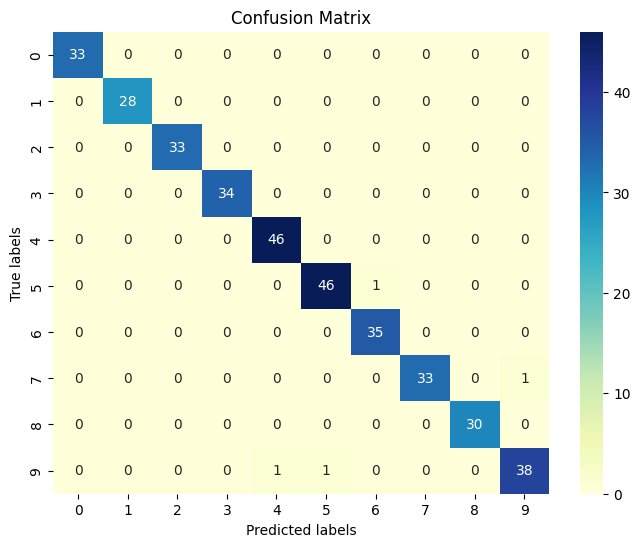

In [9]:
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [10]:
# Print the accuracy score for the optimal value of k
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy for optimal value of k: {accuracy_optimal:.3f}")

Accuracy for optimal value of k: 0.989
